<a href="https://colab.research.google.com/github/ravellys/PID/blob/master/hor%C3%A1rio_de_pico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [23]:
name = 'drive/My Drive/Aline/data/Relatório de Vendas - 2020-08-21 até 2020-08-25.csv'
df = pd.read_csv(name, header = 0, sep=";")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loja           1525 non-null   int64 
 1   PDV            1525 non-null   int64 
 2   Data da venda  1525 non-null   object
 3   Hora da venda  1525 non-null   object
dtypes: int64(2), object(2)
memory usage: 47.8+ KB


In [25]:
df.shape

(1525, 4)

In [26]:
df.columns = ["Loja", "PDV", "Data_da_venda", "Hora_da_venda"] 

In [27]:
df.head()

,Loja,PDV,Data_da_venda,Hora_da_venda
0,1041,303,21/08/2020,12:07:09
1,1041,303,21/08/2020,12:08:14
2,1041,303,21/08/2020,12:10:29
3,1041,303,21/08/2020,12:13:31
4,1041,303,21/08/2020,12:14:58


In [28]:
df['Hora'] = pd.to_datetime(df['Hora_da_venda'], format= '%H:%M:%S').apply(lambda x: x.strftime('%H')).astype(int)

In [29]:
df.head()

,Loja,PDV,Data_da_venda,Hora_da_venda,Hora
0,1041,303,21/08/2020,12:07:09,12
1,1041,303,21/08/2020,12:08:14,12
2,1041,303,21/08/2020,12:10:29,12
3,1041,303,21/08/2020,12:13:31,12
4,1041,303,21/08/2020,12:14:58,12


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loja           1525 non-null   int64 
 1   PDV            1525 non-null   int64 
 2   Data_da_venda  1525 non-null   object
 3   Hora_da_venda  1525 non-null   object
 4   Hora           1525 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 59.7+ KB


In [31]:
df.describe()

,Loja,PDV,Hora
count,1525.0,1525.000000,1525.000000
mean,1041.0,305.496393,15.739016
std,0.0,2.254949,2.257407
min,1041.0,303.000000,11.000000
25%,1041.0,303.000000,14.000000
50%,1041.0,306.000000,16.000000
75%,1041.0,307.000000,18.000000
max,1041.0,313.000000,20.000000


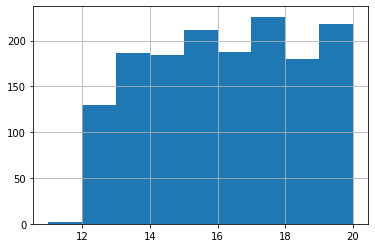

In [32]:
df['Hora'].hist(bins = df['Hora'].max() - df['Hora'].min())
plt.show()